In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv("TechElectroCustomerData.csv")
df.head()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,58,Male,Married,73598,53,Electronics
1,1002,32,Male,Divorced,31717,87,Electronics
2,1003,55,Female,Married,26952,29,Electronics
3,1004,32,Male,Divorced,38031,87,Appliances
4,1005,32,Female,Divorced,43231,18,Electronics


In [5]:
df.isnull().sum()

CustomerID            0
Age                   0
Gender                0
MaritalStatus         0
AnnualIncome (USD)    0
TotalPurchases        0
PreferredCategory     0
dtype: int64

In [6]:
df.drop_duplicates(inplace=True)

In [8]:
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['MaritalStatus'] = label_encoder.fit_transform(df['MaritalStatus'])
df['PreferredCategory'] = label_encoder.fit_transform(df['PreferredCategory'])


In [9]:
numerical_col = ['Age', 'AnnualIncome (USD)', 'TotalPurchases']
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
df['Age'] = min_max_scaler.fit_transform(df['Age'].values.reshape(-1, 1))
df['AnnualIncome (USD)'] = min_max_scaler.fit_transform(df['AnnualIncome (USD)'].values.reshape(-1, 1))
df['TotalPurchases'] = standard_scaler.fit_transform(df['TotalPurchases'].values.reshape(-1, 1))

In [10]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
0,1001,0.851064,1,1,0.745797,-0.096513,1
1,1002,0.297872,1,0,0.096318,1.497973,1
2,1003,0.787234,0,1,0.022424,-1.222033,1
3,1004,0.297872,1,0,0.194234,1.497973,0
4,1005,0.297872,0,0,0.274874,-1.737897,1


In [14]:
df_encode = pd.get_dummies(df, columns=['PreferredCategory'], drop_first=True)


In [15]:
df_encode.head()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory_1
0,1001,0.851064,1,1,0.745797,-0.096513,True
1,1002,0.297872,1,0,0.096318,1.497973,True
2,1003,0.787234,0,1,0.022424,-1.222033,True
3,1004,0.297872,1,0,0.194234,1.497973,False
4,1005,0.297872,0,0,0.274874,-1.737897,True


In [16]:
df.describe()

,CustomerID,Age,Gender,MaritalStatus,AnnualIncome (USD),TotalPurchases,PreferredCategory
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,1250.500000,0.496213,0.450000,0.988000,0.508208,9.769963e-18,0.492000
std,144.481833,0.287089,0.497992,0.813129,0.299264,1.001002e+00,0.500437
min,1001.000000,0.000000,0.000000,0.000000,0.000000,-1.737897e+00,0.000000
25%,1125.750000,0.234043,0.000000,0.000000,0.246166,-8.937567e-01,0.000000
50%,1250.500000,0.510638,0.000000,1.000000,0.518136,4.417666e-02,0.000000
75%,1375.250000,0.744681,1.000000,2.000000,0.767772,8.883167e-01,1.000000
max,1500.000000,1.000000,1.000000,2.000000,1.000000,1.638663e+00,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          500 non-null    int64  
 1   Age                 500 non-null    float64
 2   Gender              500 non-null    int32  
 3   MaritalStatus       500 non-null    int32  
 4   AnnualIncome (USD)  500 non-null    float64
 5   TotalPurchases      500 non-null    float64
 6   PreferredCategory   500 non-null    int32  
dtypes: float64(3), int32(3), int64(1)
memory usage: 21.6 KB


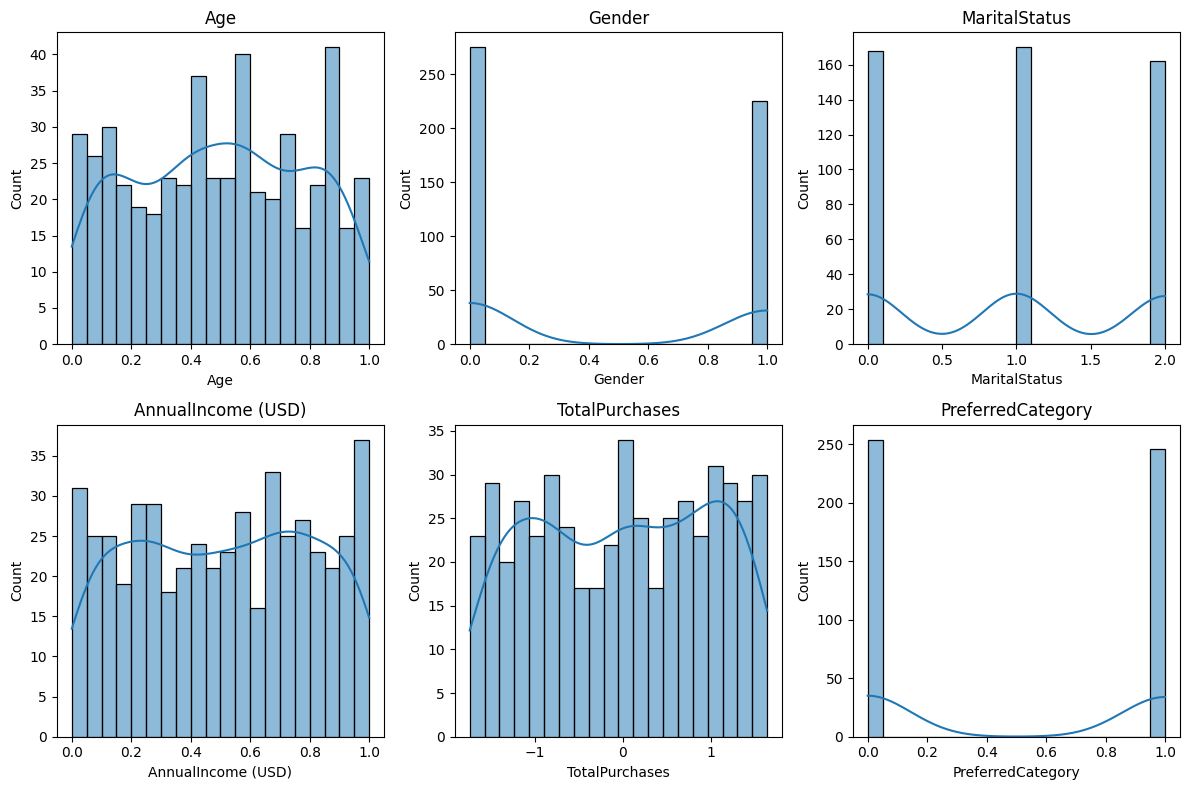

In [27]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

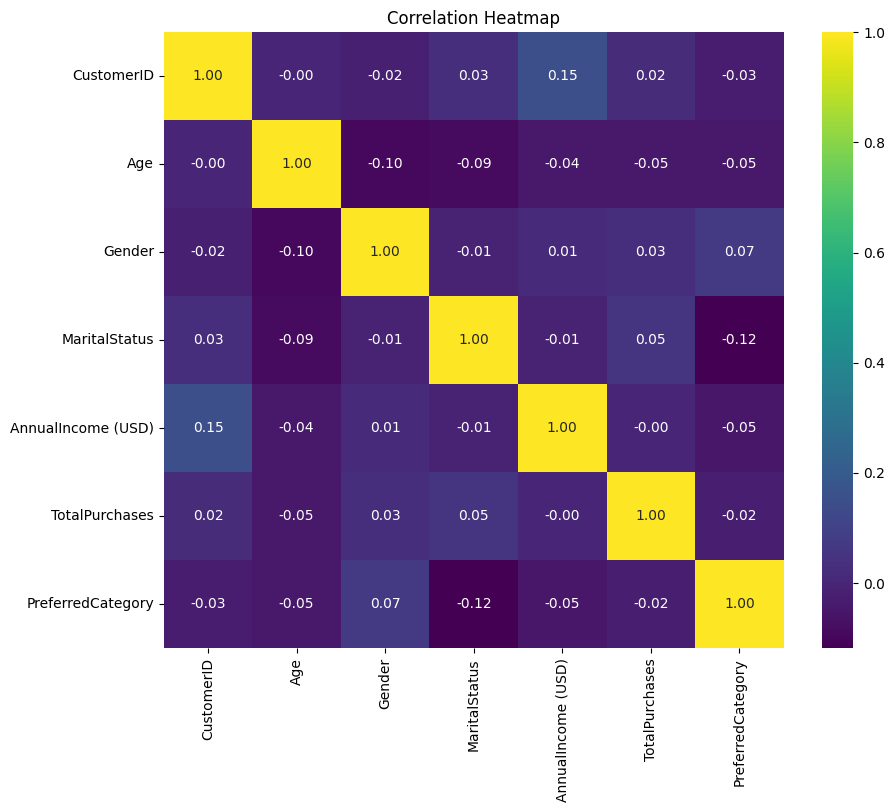

In [21]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

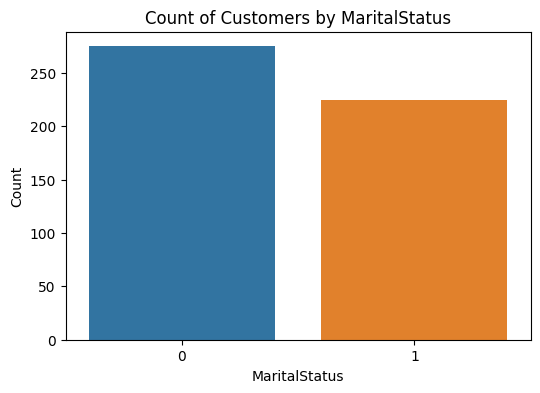

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Count of Customers by MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.show()

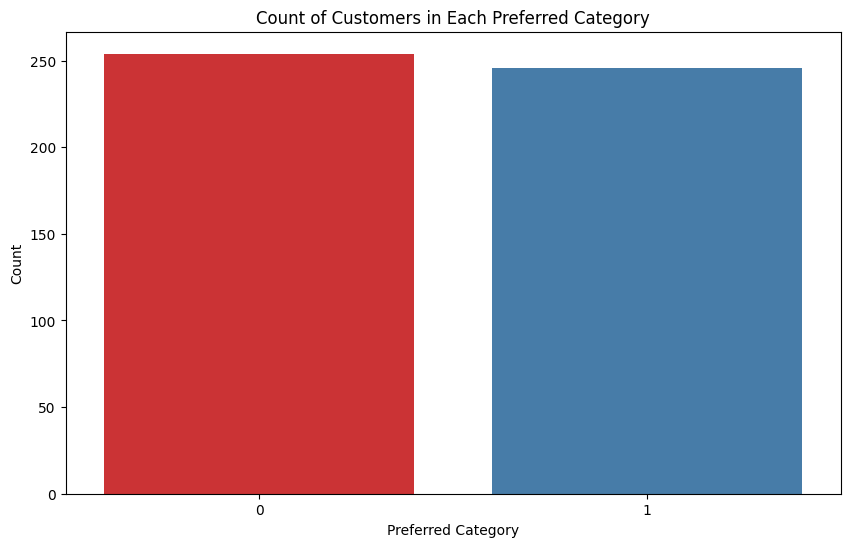

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='PreferredCategory', data=df, palette='Set1')
plt.title('Count of Customers in Each Preferred Category')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.show()

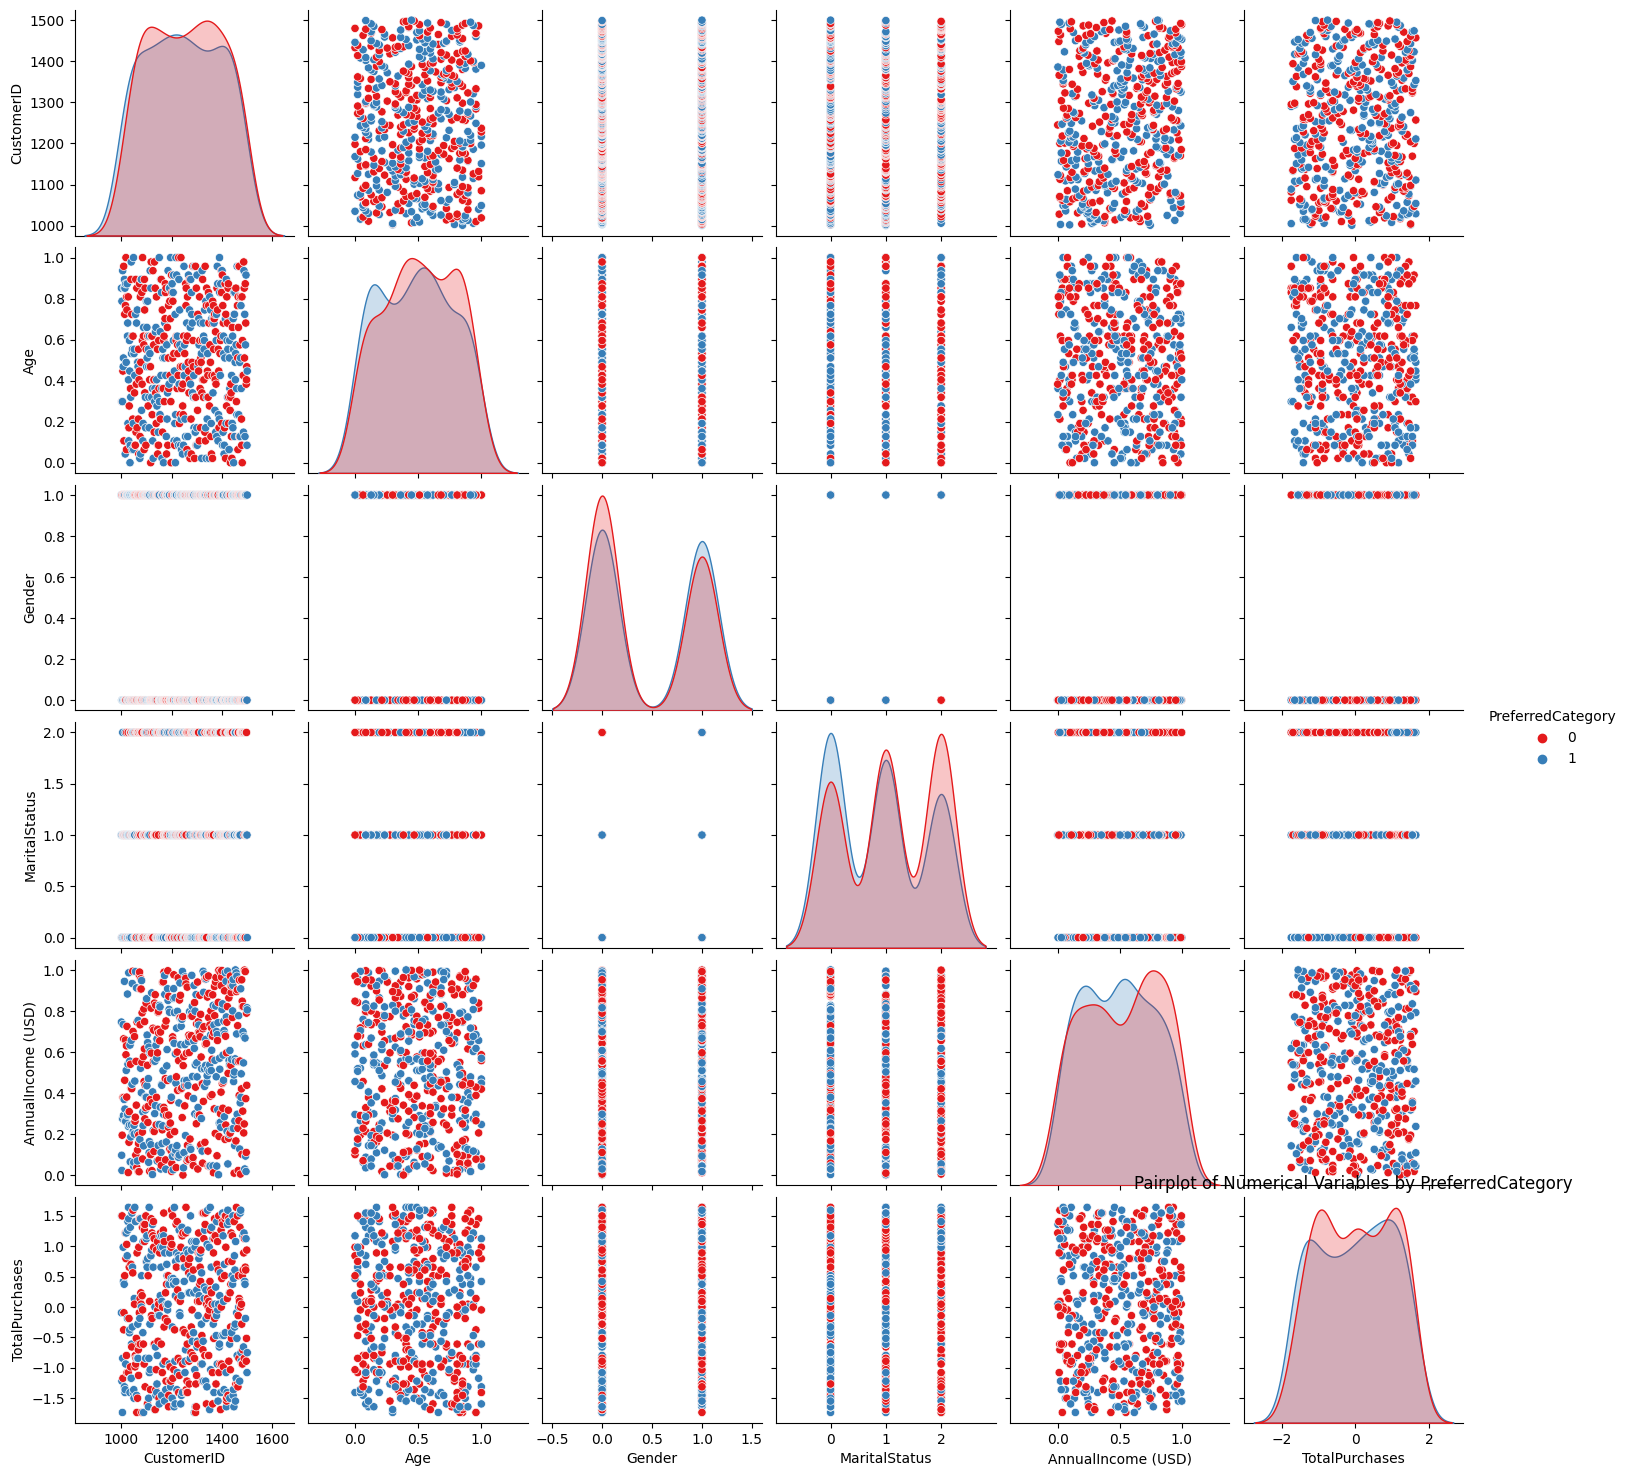

In [22]:
sns.pairplot(df, hue='PreferredCategory', palette='Set1')
plt.title('Pairplot of Numerical Variables by PreferredCategory')
plt.show()

In [32]:
features = ['AnnualIncome (USD)', 'TotalPurchases']
X = df[features]

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
wcss = [] 

In [35]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

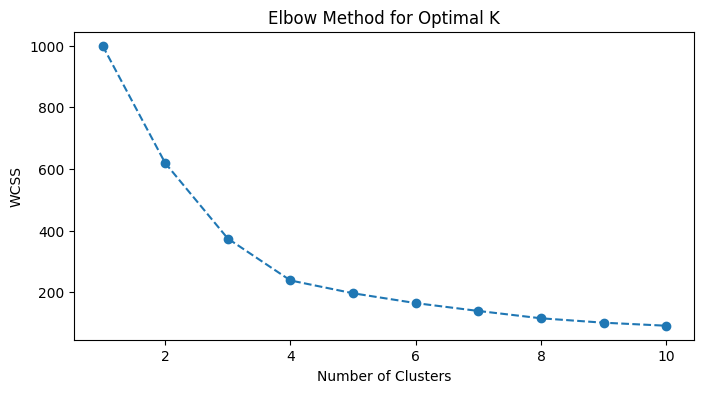

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
k = 3

kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


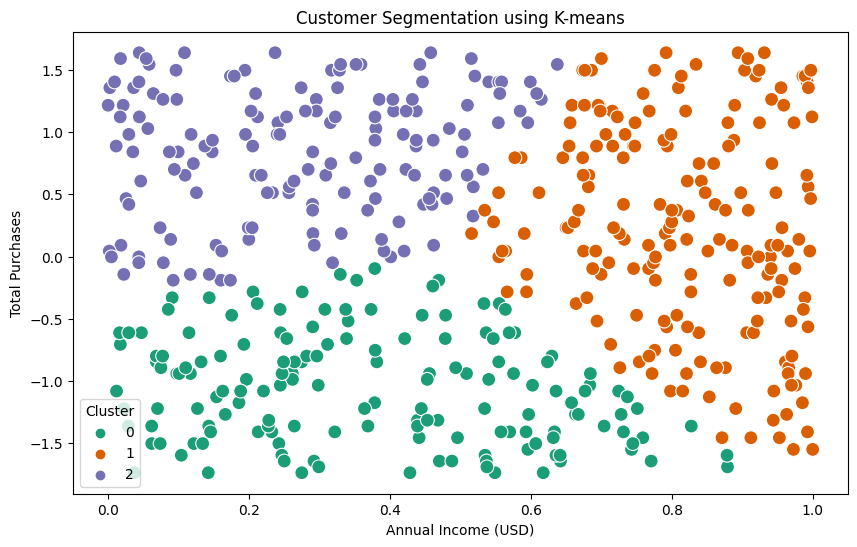

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AnnualIncome (USD)', y='TotalPurchases', data=df, hue='Cluster', palette='Dark2', s=100)
plt.title('Customer Segmentation using K-means')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Total Purchases')
plt.show()
